# Enterprise Data Science_COVID-19

### Author: Akanksha Parashar
### Matrikelnummer: 423022

## Notebook Description
- This notebook contains the simulative approach to calculate SIR curves. After fitting the parameters in SIR model, we have plotted infection rate using dynamic beta. 
- The dataset of the COVID-19 is taken from John Hopkins COVID-19 GitHub page.
- The datapath given in this notebook is of user's computer folder where the required csv files are saved.
- The data source is given in the Readme file.

In [539]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [540]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('C:/Users/hp/Documents/ads_covid_19/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('Date',ascending=True).head()

,Unnamed: 0,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,2020-01-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020-01-23,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2,2020-01-24,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,3,2020-01-25,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,4,2020-01-26,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [541]:
df_analyse.Germany[35]

21

In [542]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population # or we can say initial population
beta=0.8   # infection spread dynamics
gamma=0.1  # recovery rate
# beta/gamma gives the reproduction rate, in this case it is 4. This means 1 person can infect 4 people. That is why ratio is chosen like that.

# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [543]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [544]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [545]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999962.200353,35.699647,NaN,2.100000
1,999933.641715,60.688321,NaN,5.669965
2,999885.094280,103.166923,NaN,11.738797
3,999802.570225,175.374286,NaN,22.055489
4,999662.298495,298.108587,NaN,39.592918
5,999423.892162,506.704061,NaN,69.403776
6,999018.762446,861.163371,NaN,120.074183
7,998330.507754,1463.301726,NaN,206.190520
8,997161.820750,2485.658558,NaN,352.520692
9,995178.937700,4219.975752,NaN,601.086548


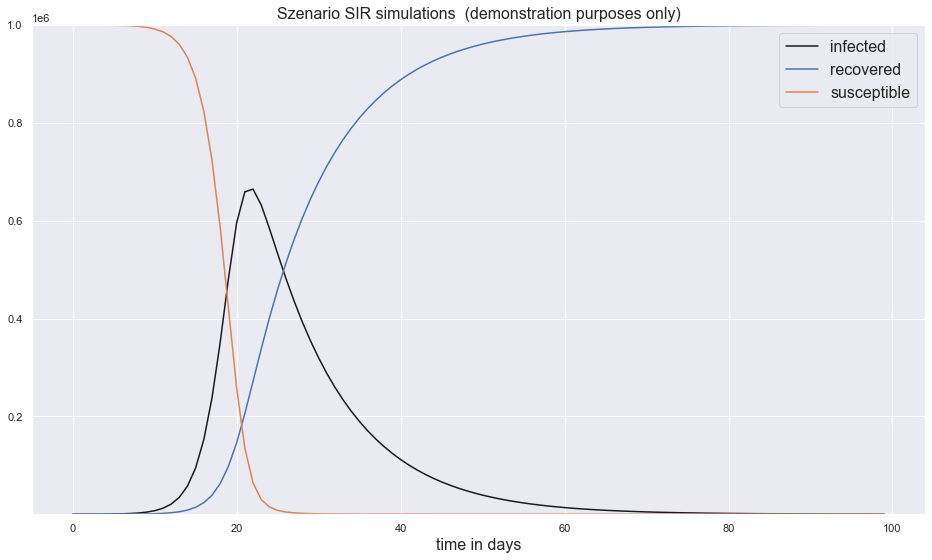

In [546]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [547]:
# we had 21 infected people and initial population as 10 lakhs
# the curve shows that these infected people will affect other people and all the population will be infected over time
# but susceptible population will decrease and recovered population will increase over time.

In [548]:
# what will be the better values for beta and gamma.
# For this we have to do fitting of our differential equations to our data of Germany or other countries
# So that we can determine our beta, gamma and initial population

# Fitting the parameters of SIR model

In [549]:
ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [550]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.8

In [551]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [552]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [553]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 2.10000000e+01,  2.83467442e+01,  3.82635349e+01,  5.16492851e+01,
        6.97171980e+01,  9.41045567e+01,  1.27020786e+02,  1.71447062e+02,
        2.31405299e+02,  3.12320402e+02,  4.21507742e+02,  5.68828389e+02,
        7.67568562e+02,  1.03561758e+03,  1.39704132e+03,  1.88417601e+03,
        2.54040014e+03,  3.42377774e+03,  4.61179988e+03,  6.20746901e+03,
        8.34695108e+03,  1.12089170e+04,  1.50254352e+04,  2.00937383e+04,
        2.67872046e+04,  3.55622587e+04,  4.69554712e+04,  6.15620761e+04,
        7.99843269e+04,  1.02737867e+05,  1.30110563e+05,  1.61985487e+05,
        1.97668411e+05,  2.35790176e+05,  2.74361695e+05,  3.11019967e+05,
        3.43420416e+05,  3.69650711e+05,  3.88523547e+05,  3.99666850e+05,
        4.03424001e+05,  4.00642226e+05,  3.92438005e+05,  3.80000472e+05,
        3.64456984e+05,  3.46798540e+05,  3.27850544e+05,  3.08272539e+05,
        2.88573617e+05,  2.69134372e+05,  2.50230013e+05,  2.32051744e+05,
        2.14725295e+05,  

In [554]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [555]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

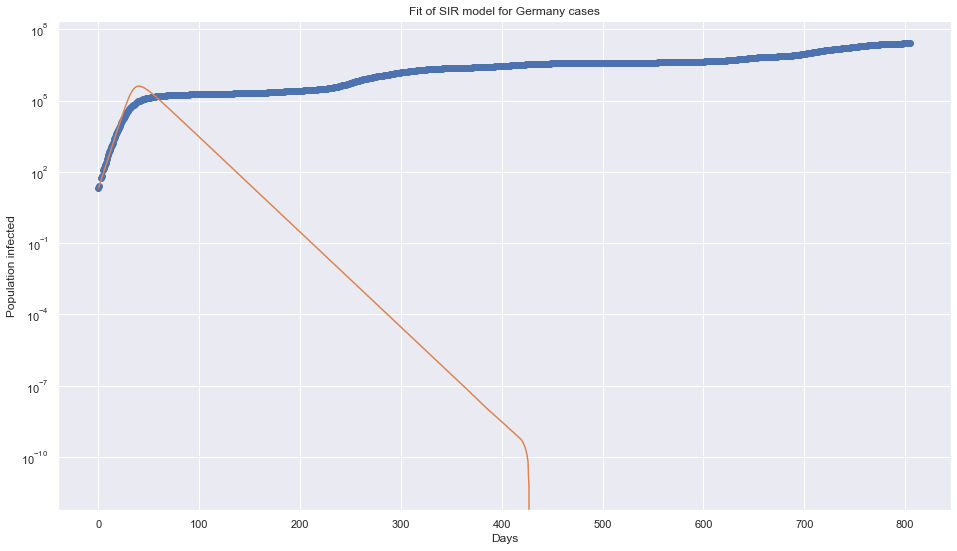

Optimal parameters: beta = 0.4  and gamma =  0.1
Basic Reproduction Number R0  4.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki


In [556]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR (infection rate)

In [557]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [558]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [559]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [560]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999970.600176,27.299824,NaN,2.100000
1,999959.680568,35.489450,NaN,4.829982
2,999945.485361,46.135712,NaN,8.378927
3,999927.032082,59.975420,NaN,12.992499
4,999903.043664,77.966295,NaN,18.990041
5,999871.860170,101.353160,NaN,26.786670
6,999831.324101,131.753913,NaN,36.921986
7,999778.631425,171.271198,NaN,50.097377
8,999710.138112,222.637391,NaN,67.224497
9,999621.108969,289.402795,NaN,89.488236


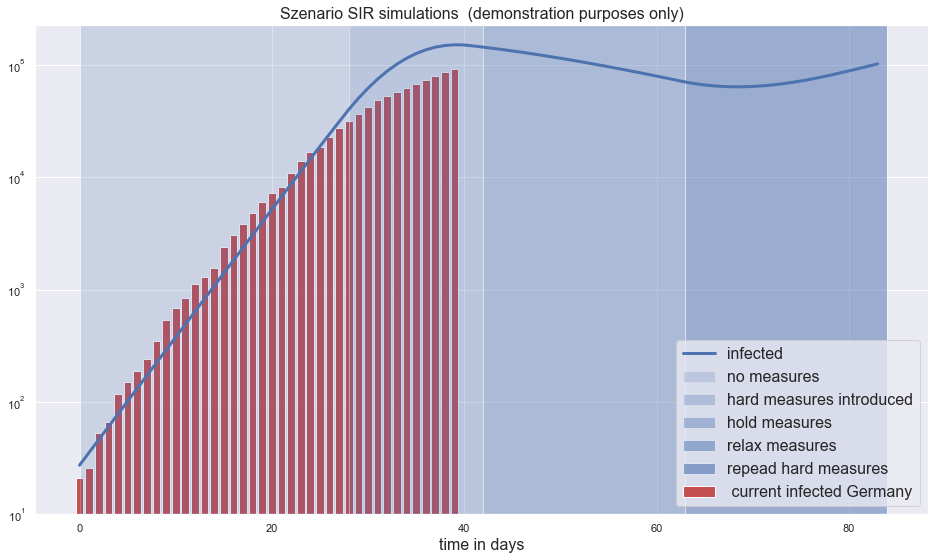

In [565]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [562]:
t_phases

array([28, 42, 63, 84])